In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf
import pandas_ta as ta
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


import empyrical as ep
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go

c:\Users\HP Victus 16\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
dft = yf.Ticker("^IXIC") ## NASDAQ Composite (0.07133)
# dft = yf.Ticker("^GSPC") ## S&P 500
# dft = yf.Ticker("TDEX.BK") ## TDEX
# dft = yf.Ticker("^DJI") ## Dow Jones Industrial Average 
# dft = yf.Ticker("AWC.BK") ## Asset World Corp Public Company Limited


tickers = {
    "^GSPC": "S&P 500",
    "^DJI": "Dow Jones Industrial Average",
    "^IXIC": "NASDAQ Composite",
    "^NYA": "NYSE COMPOSITE (DJ)",
    "^XAX": "NYSE AMEX COMPOSITE INDEX",
    "^BUK100P": "Cboe UK 100",
    "^RUT": "Russell 2000",
    "^VIX": "CBOE Volatility Index",
    "^FTSE": "FTSE 100",
    "^GDAXI": "DAX PERFORMANCE-INDEX",
    "^FCHI": "CAC 40",
    "^STOXX50E": "ESTX 50 PR.EUR",
    "^N100": "Euronext 100 Index",
    "^BFX": "BEL 20",
    "IMOEX.ME": "MOEX Russia Index",
    "^N225": "Nikkei 225",
    "^HSI": "HANG SENG INDEX",
    "000001.SS": "SSE Composite Index",
    "399001.SZ": "Shenzhen Index",
    "^STI": "STI Index",
    "^AXJO": "S&P/ASX 200",
    "^AORD": "ALL ORDINARIES",
    "^BSESN": "S&P BSE SENSEX",
    "^JKSE": "IDX COMPOSITE",
    "^KLSE": "FTSE Bursa Malaysia KLCI",
    "^NZ50": "S&P/NZX 50 INDEX GROSS (GROSS)",
    "^KS11": "KOSPI Composite Index",
    "^TWII": "TSEC weighted index",
    "^GSPTSE": "S&P/TSX Composite index",
    "^BVSP": "IBOVESPA",
    "^MXX": "IPC MEXICO",
    "^IPSA": "S&P/CLX IPSA",
    "^MERV": "MERVAL",
    "^TA125.TA": "TA-125",
    "^CASE30": "EGX 30 Price Return Index",
    "^JN0U.JO": "Top 40 USD Net TRI Index"
}

ticker_name = dft.info.get("longName", "Unknown Ticker")
print(ticker_name)

# # Define the start and end dates for the data
startDate = "1990-01-01"
endDate = "2024-01-01"

timeZone = dft.info.get("timeZoneFullName")
print(timeZone)

df = dft.history(interval="1d", start=startDate, end=endDate)

# Comparing Timestamp
# start_timestamp = int(datetime.datetime.strptime(startDate, "%Y-%m-%d").timestamp())
# print(start_timestamp)
# timestamp1 = 315550800
# timestamp2 = 315507600
# date1 = datetime.datetime.fromtimestamp(timestamp1)
# date2 = datetime.datetime.fromtimestamp(timestamp2)
# print(f"Timestamp 1: {timestamp1} -> Date 1: {date1}")
# print(f"Timestamp 2: {timestamp2} -> Date 2: {date2}")

NASDAQ Composite
America/New_York


In [3]:
# Drop Dividends column
df.drop(columns=['Dividends'], inplace=True)

# Drop Stock Splits column
df.drop(columns=['Stock Splits'], inplace=True)

df

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,452.899994,459.299988,452.700012,459.299988,110720000
1990-01-03 00:00:00-05:00,461.100006,461.600006,460.000000,460.899994,152660000
1990-01-04 00:00:00-05:00,460.399994,460.799988,456.899994,459.399994,147950000
1990-01-05 00:00:00-05:00,457.899994,459.399994,457.799988,458.200012,137230000
1990-01-08 00:00:00-05:00,457.100006,458.700012,456.500000,458.700012,115500000
...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000


In [4]:
## Calculate EMA-12 and EMA-26 using Exponential Weighing Average (EWM)
# df['EMA-12'] = df['Close'].ewm(span = 12, adjust = False).mean()
# df['EMA-26'] = df['Close'].ewm(span = 26, adjust = False).mean()

## Calculate MACD 
# df['MACD'] = df['EMA-12'] - df['EMA-26']
df['MACD'] = ta.macd(df['Close'], fast=12, slow=26, signal=9)['MACD_12_26_9']
df['Pct_Change'] = df['Close'].pct_change() * 100

## Calculate RSI using formula
## RSI = 100 – [100 ÷ ( 1 + (Average Gain During Up Periods ÷ Average Loss During Down Periods ))]

delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate the Exponential Moving Average of gains and losses
avg_gain = gain.ewm(span=14, min_periods=14).mean()
avg_loss = loss.ewm(span=14, min_periods=14).mean()

# Calculate the RS and RSI
rs = avg_gain / avg_loss
df['RSI_EMA'] = 100 - (100 / (1 + rs))

df['RSI_ta'] = ta.rsi(df['Close'], length=14)

df['MA10'] = df.ta.sma(length=10)
df['MA50'] = df.ta.sma(length=50)
df['MA200'] = df.ta.sma(length=200)

## Calculate Boilinger Bands
window = 20
df['MA20'] = df['Close'].rolling(window=window).mean()
df['std_dev'] = df['Close'].rolling(window=window).std()
df['Upper_BB'] = df['MA20'] + (df['std_dev'] * 2)
df['Lower_BB'] = df['MA20'] - (df['std_dev'] * 2)

In [5]:
df[['Close', 'MACD', 'RSI','RSI_EMA','RSI_ta']]

,Close,MACD,RSI,RSI_EMA,RSI_ta
Date,,,,,
1990-01-02 00:00:00-05:00,459.299988,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,460.899994,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,459.399994,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,458.200012,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,458.700012,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-12-22 00:00:00-05:00,14992.969727,285.226836,78.343783,72.177361,71.502475
2023-12-26 00:00:00-05:00,15074.570312,290.793938,78.894673,75.186842,73.195869
2023-12-27 00:00:00-05:00,15099.179688,293.804878,83.943354,76.086928,73.703378


In [6]:
# Create target variable: 1 if next day's close is higher than today's, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [7]:
# Fetch VIX index data
vix = yf.Ticker("^VIX")
vix_df = vix.history(interval="1d", start=startDate, end=endDate)

vix_df['Pct_Change'] = vix_df['Close'].pct_change() * 100

# print(vix_df['Pct_Change'].max())


import pytz

# Get the time zone of the stock's exchange
stock_timezone = pytz.timezone(timeZone)

# Convert the time zone of the VIX DataFrame to match the time zone of the stock's exchange
vix_df.index = vix_df.index.tz_convert(stock_timezone)

# Align the timestamps of the VIX data to match those of your DataFrame
vix_df = vix_df.reindex(df.index, method='ffill')

# Merge VIX close prices into the original DataFrame
df['VIX'] = vix_df['Close']



# # df.index = df.index.tz_convert('UTC')
# # # vix_df.index = vix_df.index.tz_convert('UTC')
# # # vix_df.index = vix_df.index.tz_convert('Asia/Bangkok')
# # vix_df.index = vix_df.index.tz_convert('Asia/Beijing')

# # # Shift the timestamps of vix_df by one hour
# # vix_df.index = vix_df.index - pd.Timedelta(hours=1)


# # # Merge VIX close prices into the original DataFrame
# # # df['VIX'] = vix_df['Close']

# # df = df.join(vix_df[['Close']], rsuffix='_VIX')

# # Rename the VIX close column
# df.rename(columns={'Close_VIX': 'VIX'}, inplace=True)

vix_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Pct_Change
Date,,,,,,,,
1990-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,17.240000,17.240000,17.240000,17.240000,0.0,0.0,0.0,NaN
1990-01-04 00:00:00-05:00,18.190001,18.190001,18.190001,18.190001,0.0,0.0,0.0,5.510445
1990-01-05 00:00:00-05:00,19.219999,19.219999,19.219999,19.219999,0.0,0.0,0.0,5.662445
1990-01-08 00:00:00-05:00,20.110001,20.110001,20.110001,20.110001,0.0,0.0,0.0,4.630600
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,13.400000,14.490000,13.340000,13.650000,0.0,0.0,0.0,-0.146309
2023-12-26 00:00:00-05:00,13.720000,13.960000,13.000000,13.030000,0.0,0.0,0.0,-4.542124
2023-12-27 00:00:00-05:00,13.770000,13.800000,12.960000,12.990000,0.0,0.0,0.0,-0.306984


In [8]:
df

,Open,High,Low,Close,Volume,MACD,Pct_Change,RSI,RSI_EMA,RSI_ta,MA10,MA50,MA200,MA20,std_dev,Upper_BB,Lower_BB,Target,VIX
Date,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,452.899994,459.299988,452.700012,459.299988,110720000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1990-01-03 00:00:00-05:00,461.100006,461.600006,460.000000,460.899994,152660000,NaN,0.348358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17.240000
1990-01-04 00:00:00-05:00,460.399994,460.799988,456.899994,459.399994,147950000,NaN,-0.325450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.190001
1990-01-05 00:00:00-05:00,457.899994,459.399994,457.799988,458.200012,137230000,NaN,-0.261206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19.219999
1990-01-08 00:00:00-05:00,457.100006,458.700012,456.500000,458.700012,115500000,NaN,0.109123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,285.226836,0.194466,78.343783,72.177361,71.502475,14791.813965,13911.152461,13287.628018,14526.836475,306.337551,15139.511576,13914.161373,1,13.650000
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,290.793938,0.544259,78.894673,75.186842,73.195869,14856.021973,13944.499258,13307.306421,14568.514014,321.721675,15211.957365,13925.070663,1,13.030000
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,293.804878,0.163251,83.943354,76.086928,73.703378,14912.599902,13975.123242,13326.858120,14609.385010,335.022480,15279.429971,13939.340049,0,12.990000


In [9]:
# plt.figure(figsize=(20,6))
# plt.plot(df['Close'], label="Closed Price")
# mx = df['Close'].max()
# plt.plot(vix_df['Close'] * mx / 100, label="VIX Index")
# plt.legend()
# plt.title(f"VIX Index and {ticker_name} Price (Adjusted Index)")
# plt.show()

# Create the plotly figure
fig = go.Figure()

# Add the closed price line
fig.add_trace(go.Scatter(
    x=df.index, 
    y=df['Close'], 
    mode='lines', 
    name='Closed Price',
    hovertemplate='%{x|%Y-%m-%d}<br>Price: %{y}'
))

mx = df['Close'].max()

# Add the VIX index line, Scaled out of Max stock price
fig.add_trace(go.Scatter(
    x=vix_df.index, 
    y=vix_df['Close'] * mx / 100, 
    mode='lines', 
    name='VIX',
    hovertemplate='%{x|%Y-%m-%d}<br>VIX Index: %{customdata:.2f}',
    customdata=vix_df['Close']  # Use the real VIX values as customdata
))

# Update layout
fig.update_layout(
    title=f"VIX Index to {ticker_name} Price (Adjusted Index)",
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend",
    width=2100,
    height=700
)

# Show the plot
fig.show()

In [10]:
# plt.figure(figsize=(25,10))
# plt.plot(vix_df['Pct_Change'], label="VIX Index")
# plt.legend()
# plt.title("VIX Index Percentage Change")
# plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=vix_df.index, y=vix_df['Close'], mode='lines', name='Percentage Change'))
fig.update_layout(
    title=f"VIX Index Closed Price",
    xaxis_title="Date",
    yaxis_title="Percentage Change",
    legend_title="Legend",
    width=3500,
    height=700
)

fig.show()



In [11]:
# print("Main DataFrame Index:", df.index)
# print("VIX DataFrame Index:", vix_df.index)

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    line=dict(color='cyan'),
    name=f"{ticker_name} Price")
)

fig.update_layout(
    title=f"{ticker_name} Price",
    xaxis_title="Date",
    yaxis_title="Price",
    width=1200,
    height=600
)

fig.show()


In [13]:
import plotly.graph_objects as go

fig = go.Figure()

# Plot the VIX index
fig.add_trace(go.Scatter(
    x=vix_df.index,
    y=vix_df['Close'],
    mode='lines',
    line=dict(color='purple'),
    name='VIX Index')
)

prev_vix = None
gt_vix_date = []
xtr_vix_date = []

# Iterate through the VIX data
for date, vix_value in vix_df['Close'].items():
    if vix_value >= 65 and (prev_vix is None or prev_vix < 65):
        fig.add_trace(go.Scatter(
            x=[date],
            y=[vix_value],
            mode='markers',
            marker=dict(color='green', symbol='x'),
            name=str(date)  # Convert Timestamp to string
        ))
        xtr_vix_date.append([date, vix_value])
    elif vix_value >= 35 and (prev_vix is None or prev_vix < 35):
        fig.add_trace(go.Scatter(
            x=[date],
            y=[vix_value],
            mode='markers',
            marker=dict(color='red', symbol='circle'),
            name=str(date)  # Convert Timestamp to string
        ))
        gt_vix_date.append([date, vix_value])
    prev_vix = vix_value

fig.update_layout(
    title="VIX Index",
    xaxis_title="Date",
    yaxis_title="VIX Value",
    width=4200,
    height=600
)

fig.show()


In [14]:
# Remove any row with NaN value
df = df.dropna()

# Print out list where the VIX is greater than 30
gt_vix = df[df['VIX'] > 30]
# gt_vix

gt_vix_df = pd.DataFrame(gt_vix_date, columns=['Date', 'VIX'])
gt_vix_df.set_index('Date', inplace=True)

# Convert xtr_vix_date to DataFrame
xtr_vix_df = pd.DataFrame(xtr_vix_date, columns=['Date', 'VIX'])
xtr_vix_df.set_index('Date', inplace=True)

# df['VIX_35'] = df.index.isin(gt_vix_df.index)
# df['VIX_65'] = df.index.isin(xtr_vix_df.index)
df

,Open,High,Low,Close,Volume,MACD,Pct_Change,RSI,RSI_EMA,RSI_ta,MA10,MA50,MA200,MA20,std_dev,Upper_BB,Lower_BB,Target,VIX
Date,,,,,,,,,,,,,,,,,,,
1990-10-15 00:00:00-04:00,329.500000,330.100006,325.899994,329.500000,104220000,-13.003200,0.579974,30.508473,26.357675,27.218537,340.839999,371.982000,424.026600,348.820001,13.418079,375.656160,321.983843,0,31.940001
1990-10-16 00:00:00-04:00,328.500000,329.700012,325.000000,325.399994,117130000,-13.231861,-1.244311,30.841111,22.905150,25.305602,337.739999,370.490000,423.357100,346.480000,13.205286,372.890572,320.069429,1,31.639999
1990-10-17 00:00:00-04:00,325.100006,328.000000,324.100006,326.799988,121780000,-13.148540,0.430238,37.323919,26.688623,27.187381,335.269998,368.984000,422.686600,344.234999,12.489290,369.213580,319.256418,1,31.450001
1990-10-18 00:00:00-04:00,328.799988,334.000000,327.399994,334.000000,139290000,-12.359059,2.203186,41.350908,43.223141,36.103023,333.679999,367.509999,422.059600,342.714999,11.732962,366.180923,319.249076,1,31.370001
1990-10-19 00:00:00-04:00,338.399994,338.799988,335.799988,337.399994,159110000,-11.328452,1.017962,33.951744,49.436801,39.848621,332.679999,365.997999,421.455600,341.470000,10.831879,363.133757,319.806242,1,29.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,285.226836,0.194466,78.343783,72.177361,71.502475,14791.813965,13911.152461,13287.628018,14526.836475,306.337551,15139.511576,13914.161373,1,13.650000
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,290.793938,0.544259,78.894673,75.186842,73.195869,14856.021973,13944.499258,13307.306421,14568.514014,321.721675,15211.957365,13925.070663,1,13.030000
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,293.804878,0.163251,83.943354,76.086928,73.703378,14912.599902,13975.123242,13326.858120,14609.385010,335.022480,15279.429971,13939.340049,0,12.990000


In [15]:
cvTest = False


if not cvTest:
    cv_scores = np.array([0.0, 0.0])
    md2_cv_scores = np.array([0.0, 0.0])
    ensemble1_cv_scores = np.array([0.0, 0.0])
    ensemble_cv_scores = np.array([0.0, 0.0])
    
# Prepare the feature set and target variable
X = df[['Pct_Change', 'std_dev', 'MA200', 'MA50', 'MA10', 'MACD', 'RSI_ta', 'VIX']]
# X = df[['Pct_Change', 'std_dev', 'MA200', 'MA50', 'MA10', 'MACD', 'RSI_ta', 'VIX']]
# X = df[['MA200', 'MA50', 'MA10', 'MACD2', 'RSI_ta', 'VIX', 'VIX_35', 'VIX_65']]
# X = df[['SMA200', 'SMA50', 'SMA10', 'MACD', 'RSI', 'VIX', 'VIX_35', 'VIX_65', 'MA20', 'Lower_BB', 'Upper_BB']]
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=5, 
    min_samples_leaf=1, 
    min_samples_split=10
)

model.fit(X_train, y_train)

print("Train score : ", model.score(X_train,y_train))
print("Test score : ", model.score(X_test,y_test))

from sklearn.model_selection import cross_val_score

if cvTest:
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())


Train score :  0.5905558876270174
Test score :  0.551373954599761


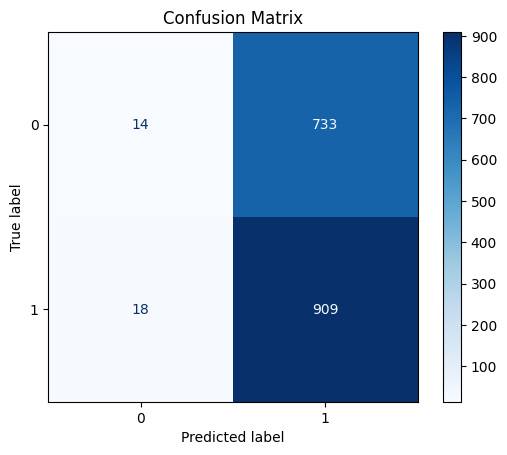

In [16]:
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Check feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))

# Hyperparameter tuning example using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

# # Re-train the model with the best parameters
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)
# print("Train score with best parameters: ", best_model.score(X_train, y_train))
# print("Test score with best parameters: ", best_model.score(X_test, y_test))



# Output

# Feature  Importance
# 4     RSI    0.207028
# 3    MACD    0.173785
# 5     VIX    0.161541
# 0  SMA200    0.156257
# 2   SMA10    0.150279
# 1   SMA50    0.146876
# 6  VIX_35    0.002741
# 7  VIX_65    0.001494
# Fitting 3 folds for each of 54 candidates, totalling 162 fits
# Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
# Best cross-validation score:  0.513870182753551
# Train score with best parameters:  0.5857438016528925
# Test score with best parameters:  0.5050147492625369

      Feature  Importance
0  Pct_Change    0.185050
6      RSI_ta    0.144532
1     std_dev    0.134507
5        MACD    0.132619
2       MA200    0.118381
7         VIX    0.098836
4        MA10    0.096632
3        MA50    0.089444


In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],            # Maximum depth of a tree
    'learning_rate': [0.1, 0.01, 0.001], # Learning rate
    'subsample': [0.8, 0.9],           # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9],    # Subsample ratio of columns when constructing each tree
    'gamma': [0.1, 0.2],               # Minimum loss reduction required to make a further partition
    'reg_alpha': [0.1, 0.2],           # L1 regularization term on weights
    'reg_lambda': [0.1, 0.2]           # L2 regularization term on weights
}

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Print the best parameters and score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

# # Evaluate the model with the best parameters
# best_xgb_model = grid_search.best_estimator_
# print("XGB Train score:", best_xgb_model.score(X_train, y_train))
# print("XGB Test score:", best_xgb_model.score(X_test, y_test))

# Output

# Best Parameters: {'colsample_bytree': 0.8, 
#     'gamma': 0.1, 
#     'learning_rate': 0.001, 
#     'max_depth': 3, 
#     'n_estimators': 100, 
#     'reg_alpha': 0.1, 
#     'reg_lambda': 0.1, 
#     'subsample': 0.8 
# }
# Best Score: 0.5494392014716607
# XGB Train score: 0.5494391971664699
# XGB Test score: 0.5510324483775811


In [19]:
pipe = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("classifier", KNeighborsClassifier())
]) 
pipe.fit(X_train, y_train)
class_names = pipe.classes_
class_names
y_pred = pipe.predict(X_test)
acc_train = accuracy_score(y_train, pipe.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

if cvTest:
    md2_cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-validation scores:", md2_cv_scores)
    print("Mean cross-validation score:", md2_cv_scores.mean())

Train Accuracy: 0.6925, Test Accuracy: 0.552


In [20]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Define the models
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.00825)

# Create the ensemble
ensemble_model1 = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')

# Fit the ensemble
ensemble_model1.fit(X_train, y_train)

# Evaluate the ensemble
print("Ensemble Train score:", ensemble_model1.score(X_train, y_train))
print("Ensemble Test score:", ensemble_model1.score(X_test, y_test))

if cvTest:
    # Cross-validation
    ensemble1_cv_scores = cross_val_score(ensemble_model1, X, y, cv=5)
    print("Ensemble Cross-validation scores:", ensemble1_cv_scores)
    print("Ensemble Mean cross-validation score:", ensemble1_cv_scores.mean())


Ensemble Train score: 0.588314405260012
Ensemble Test score: 0.5352449223416965


In [21]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# Define hyperparameters grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define hyperparameters grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001, 0.005, 0.0025, 0.00125],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0.1, 0.2],
    'reg_alpha': [0.1, 0.2],
    'reg_lambda': [0.1, 0.2]
}

# Define models
# rf = RandomForestClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)

gridSearch = False

rf = RandomForestClassifier(random_state=42, max_depth=5, 
                            min_samples_leaf=1, min_samples_split=5, 
                            n_estimators=91)

xgb = XGBClassifier(random_state=42, colsample_bytree=0.8, 
                    gamma=0.1, learning_rate=0.001, 
                    max_depth=3, n_estimators=100, 
                    reg_alpha=0.1, reg_lambda=0.1, 
                    subsample=0.8)

# Perform GridSearchCV for Random Forest
if gridSearch:
    rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    rf_grid_search.fit(X_train, y_train)
    best_rf = rf_grid_search.best_estimator_
else: 
    rf.fit(X_train, y_train)

# Perform GridSearchCV for XGBoost
if gridSearch:
    xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    xgb_grid_search.fit(X_train, y_train)
    best_xgb = xgb_grid_search.best_estimator_
else:
    xgb.fit(X_train, y_train)

# Create the ensemble with best estimators
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble
print("Ensemble Train score:", ensemble_model.score(X_train, y_train))
print("Ensemble Test score:", ensemble_model.score(X_test, y_test))

# Cross-validation
if cvTest:
    ensemble_cv_scores = cross_val_score(ensemble_model, X, y, cv=5)
    print("Ensemble Cross-validation scores:", ensemble_cv_scores)
    print("Ensemble Mean cross-validation score:", ensemble_cv_scores.mean())


Ensemble Train score: 0.5566347878063359
Ensemble Test score: 0.5567502986857825


In [22]:
# print(rf_grid_search.best_params_)
# {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

# print(xgb_grid_search.best_params_)
# {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}

In [23]:
print("Model 1")
print(f"Train score : {model.score(X_train,y_train):0.5} \nTest score  : {model.score(X_test,y_test):0.5}")
if cvTest: print(f"CV Score    : {cv_scores.mean():0.5}\n")

print("Model 2")
print(f"Train score : {acc_train:0.5} \nTest score  : {acc_test:0.5}")
if cvTest: print(f"CV Score    : {md2_cv_scores.mean():0.5}\n")

print("Model 3")
print(f"Train score : {ensemble_model1.score(X_train, y_train):0.5} \nTest score  : {ensemble_model1.score(X_test, y_test):0.5}")
if cvTest: print(f"CV Score    : {ensemble1_cv_scores.mean():0.5}\n")

print("Model 4")
print(f"Train score : {ensemble_model.score(X_train, y_train):0.5} \nTest score  : {ensemble_model.score(X_test, y_test):0.5}")
if cvTest: print(f"CV Score    : {ensemble_cv_scores.mean():0.5}\n")


Model 1
Train score : 0.59056 
Test score  : 0.55137
Model 2
Train score : 0.69247 
Test score  : 0.55197
Model 3
Train score : 0.58831 
Test score  : 0.53524
Model 4
Train score : 0.55663 
Test score  : 0.55675


In [24]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add bars for each model with different colors
fig.add_trace(go.Bar(
    x=['Train', 'Test', 'CV'],
    y=[
        model.score(X_train, y_train), 
        model.score(X_test, y_test), 
        cv_scores.mean()
    ],
    name='Model 1',
    marker_color='blue',
    text=[model.score(X_train, y_train), model.score(X_test, y_test), cv_scores.mean()],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=['Train', 'Test', 'CV'],
    y=[
        acc_train, 
        acc_test, 
        md2_cv_scores.mean()
    ],
    name='Model 2',
    marker_color='orange',
    text=[acc_train, acc_test, md2_cv_scores.mean()],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=['Train', 'Test', 'CV'],
    y=[
        ensemble_model1.score(X_train, y_train), 
        ensemble_model1.score(X_test, y_test), 
        ensemble1_cv_scores.mean()
    ],
    name='Model 3',
    marker_color='green',
    text=[ensemble_model1.score(X_train, y_train), ensemble_model1.score(X_test, y_test), ensemble1_cv_scores.mean()],
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=['Train', 'Test', 'CV'],
    y=[
        ensemble_model.score(X_train, y_train), 
        ensemble_model.score(X_test, y_test), 
        ensemble_cv_scores.mean()
    ],
    name='Model 4',
    marker_color='red',
    text=[ensemble_model.score(X_train, y_train), ensemble_model.score(X_test, y_test), ensemble_cv_scores.mean()],
    textposition='auto'
))

# Update the layout
fig.update_layout(
    title='Model Scores Comparison',
    xaxis_title='Score',
    yaxis_title='Score out of 1.0',
    barmode='group',
    legend_title='Models',
    xaxis=dict(
        tickmode='array',
        tickvals=['Train', 'Test', 'CV']
    )
)

# Show the plot
fig.show()


In [25]:
df[df['VIX'] > 40]

,Open,High,Low,Close,Volume,MACD,Pct_Change,RSI,RSI_EMA,RSI_ta,MA10,MA50,MA200,MA20,std_dev,Upper_BB,Lower_BB,Target,VIX
Date,,,,,,,,,,,,,,,,,,,
1998-09-01 00:00:00-04:00,1509.010010,1577.510010,1475.489990,1575.089966,1258680000,-68.911136,5.058527,27.094468,28.063696,29.981547,1723.029993,1860.209397,1752.844303,1770.905493,96.136214,1963.177922,1578.633064,1,44.279999
1998-09-04 00:00:00-04:00,1586.329956,1593.920044,1543.859985,1566.520020,623410000,-78.979650,-0.339723,26.162858,29.124099,30.675491,1648.878003,1843.122397,1752.510153,1734.242993,115.240201,1964.723395,1503.762591,1,41.430000
1998-09-08 00:00:00-04:00,1566.520020,1660.920044,1566.520020,1660.859985,780330000,-72.530882,6.022264,33.392041,48.853560,42.947559,1635.882007,1838.948997,1752.808353,1725.325494,113.578709,1952.482913,1498.168076,0,43.310001
1998-09-11 00:00:00-04:00,1599.800049,1642.079956,1585.280029,1641.640015,706720000,-64.262741,3.551946,38.169218,48.519773,43.499430,1595.763000,1821.973799,1752.894453,1696.862994,113.581737,1924.026469,1469.699520,1,45.290001
1998-09-14 00:00:00-04:00,1660.310059,1677.900024,1641.640015,1665.689941,686720000,-57.471202,1.464994,40.750706,52.423629,46.037233,1598.363989,1817.407598,1753.277703,1690.637994,111.591888,1913.821770,1467.454219,1,43.740002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22 00:00:00-04:00,8434.549805,8537.309570,8404.540039,8495.379883,3041520000,141.845051,2.809427,73.309884,60.322554,56.371794,8384.766064,8296.894199,8409.644006,8001.380029,442.376375,8886.132779,7116.627280,0,45.410000
2020-04-23 00:00:00-04:00,8528.839844,8635.230469,8475.200195,8494.750000,3759890000,148.716005,-0.007414,71.824387,60.292523,56.359219,8425.151074,8274.010391,8411.409106,8056.902539,430.373841,8917.650222,7196.154856,1,41.980000
2020-04-24 00:00:00-04:00,8530.080078,8642.929688,8464.419922,8634.519531,3696020000,163.554168,1.645364,77.027761,64.781647,58.567811,8473.245020,8252.181582,8413.569053,8098.751514,444.294649,8987.340812,7210.162215,1,41.380001


In [26]:
df

,Open,High,Low,Close,Volume,MACD,Pct_Change,RSI,RSI_EMA,RSI_ta,MA10,MA50,MA200,MA20,std_dev,Upper_BB,Lower_BB,Target,VIX
Date,,,,,,,,,,,,,,,,,,,
1990-10-15 00:00:00-04:00,329.500000,330.100006,325.899994,329.500000,104220000,-13.003200,0.579974,30.508473,26.357675,27.218537,340.839999,371.982000,424.026600,348.820001,13.418079,375.656160,321.983843,0,31.940001
1990-10-16 00:00:00-04:00,328.500000,329.700012,325.000000,325.399994,117130000,-13.231861,-1.244311,30.841111,22.905150,25.305602,337.739999,370.490000,423.357100,346.480000,13.205286,372.890572,320.069429,1,31.639999
1990-10-17 00:00:00-04:00,325.100006,328.000000,324.100006,326.799988,121780000,-13.148540,0.430238,37.323919,26.688623,27.187381,335.269998,368.984000,422.686600,344.234999,12.489290,369.213580,319.256418,1,31.450001
1990-10-18 00:00:00-04:00,328.799988,334.000000,327.399994,334.000000,139290000,-12.359059,2.203186,41.350908,43.223141,36.103023,333.679999,367.509999,422.059600,342.714999,11.732962,366.180923,319.249076,1,31.370001
1990-10-19 00:00:00-04:00,338.399994,338.799988,335.799988,337.399994,159110000,-11.328452,1.017962,33.951744,49.436801,39.848621,332.679999,365.997999,421.455600,341.470000,10.831879,363.133757,319.806242,1,29.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,285.226836,0.194466,78.343783,72.177361,71.502475,14791.813965,13911.152461,13287.628018,14526.836475,306.337551,15139.511576,13914.161373,1,13.650000
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,290.793938,0.544259,78.894673,75.186842,73.195869,14856.021973,13944.499258,13307.306421,14568.514014,321.721675,15211.957365,13925.070663,1,13.030000
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,293.804878,0.163251,83.943354,76.086928,73.703378,14912.599902,13975.123242,13326.858120,14609.385010,335.022480,15279.429971,13939.340049,0,12.990000


In [27]:
df['Signal'] = 0
# df.loc[X_test.index, 'Signal'] = model.predict(X_test) ## Model 1 Random Forest
# df.loc[X_test.index, 'Signal'] = ensemble_model1.predict(X_test) ## Model 2 Random Forest + XGBoost
df.loc[X_test.index, 'Signal'] = ensemble_model.predict(X_test) ## Model 3 More precise Random Forest + XGBoost 

# Initialize the 'Position' column
df['Position'] = 0



## Iterate through the DataFrame to apply the conditions
holding_position = False

## Condition 1

order_list = []

start_idx = df.index.get_loc(X_test.index[0])

# for i in range(1, len(df)): 
#     if df.loc[df.index[i], 'VIX'] > 30:
#         # print(df.index[i])
#         if df.loc[df.index[i], 'Signal'] == 1 and df.loc[df.index[i], 'VIX'] > 80 and not holding_position:
#             order_list.append({df.index[i],'80'})
#             df.loc[df.index[i], 'Position'] = 1
#             holding_position = True
#         elif df.loc[df.index[i], 'VIX'] > 70 and holding_position and df.loc[df.index[i], 'VIX'] <= 75:
#             df.loc[df.index[i], 'Position'] = 0
#             holding_position = False
#         elif df.loc[df.index[i], 'Signal'] == 1 and df.loc[df.index[i], 'VIX'] > 70 and not holding_position:
#             order_list.append({df.index[i],'70'})
#             df.loc[df.index[i], 'Position'] = 1
#             holding_position = True
#         elif df.loc[df.index[i], 'VIX'] > 65 and holding_position and df.loc[df.index[i], 'VIX'] <= 70:
#             df.loc[df.index[i], 'Position'] = 0
#             holding_position = False
#         elif df.loc[df.index[i], 'Signal'] == 1 and df.loc[df.index[i], 'VIX'] > 55 and not holding_position and df.loc[df.index[i], 'VIX'] <= 65:
#             order_list.append({df.index[i],'55'})
#             df.loc[df.index[i], 'Position'] = 1
#             holding_position = True
#         elif df.loc[df.index[i], 'VIX'] > 45 and holding_position:
#             df.loc[df.index[i], 'Position'] = 0
#             holding_position = False
#         elif df.loc[df.index[i], 'Signal'] == 1 and not holding_position and df.loc[df.index[i], 'VIX'] <= 45:
#         # elif not holding_position and df.loc[df.index[i], 'VIX'] < 50:
#             order_list.append({df.index[i],'30'})
#             df.loc[df.index[i], 'Position'] = 1
#             holding_position = True
#     # elif (df.loc[df.index[i], 'VIX'] < 20 or df.loc[df.index[i], 'Signal'] == 0) and holding_position:
#     elif (df.loc[df.index[i], 'VIX'] < 20 ) and holding_position:
#         df.loc[df.index[i], 'Position'] = 0
#         holding_position = False
        
# for i in range(start_idx, len(df)): 
#     if df.loc[df.index[i], 'VIX'] > 30:
#         print("40")
#         if df.loc[df.index[i], 'VIX'] > 50 and not holding_position:
#             df.loc[df.index[i], 'Position'] = 1
#             holding_position = True
#         elif df.loc[df.index[i], 'VIX'] > 50 and holding_position:
#             df.loc[df.index[i], 'Position'] = 0
#             holding_position = False
#         elif not holding_position and df.loc[df.index[i], 'VIX'] < 40:
#         # elif df.loc[df.index[i], 'Signal'] == 1 and not holding_position and df.loc[df.index[i], 'VIX'] < 50:
#             df.loc[df.index[i], 'Position'] = 1
#             holding_position = True
#     elif (df.loc[df.index[i], 'VIX'] < 20 ) and holding_position:
#         df.loc[df.index[i], 'Position'] = 0
#         holding_position = False
    
    ## or df.loc[df.index[i], 'Signal'] == 0
##  Condition 2

# for i in range(1, len(df)):
#     if df.loc[df.index[i], 'Signal'] == 1 and df.loc[df.index[i], 'VIX'] > 35 and not holding_position:
#         df.loc[df.index[i], 'Position'] = 1
#         holding_position = True
#     elif (df.loc[df.index[i], 'VIX'] < 20 or df.loc[df.index[i], 'Signal'] == 0) and holding_position:
#     # if (df.loc[df.index[i], 'VIX'] < 20 ) and holding_position:
#         # print("Closing position VIX less than 30 at : ", df.index[i])
#         df.loc[df.index[i], 'Position'] = 0
#         # print(df.loc[df.index[i], 'Position'])
#         holding_position = False
#     elif df.loc[df.index[i], 'VIX'] > 45 and holding_position:
#         df.loc[df.index[i], 'Position'] = 0
#         holding_position = False
#     elif df.loc[df.index[i], 'VIX'] > 60 and not holding_position:
#         df.loc[df.index[i], 'Position'] = 1
#         # print("hello", df.index[i])
#         holding_position = True
        
for i in range(start_idx, len(df)):
    if df.loc[df.index[i], 'Signal'] == 1 and not holding_position:
        df.loc[df.index[i], 'Position'] = 1
        holding_position = True
    elif  df.loc[df.index[i], 'Signal'] == 0 and holding_position:
        df.loc[df.index[i], 'Position'] = 0
        holding_position = False


# Forward fill the positions to simulate holding positions
df['Position'] = df['Position'].replace(to_replace=0, method='ffill')

# Calculate strategy returns
# df['Strategy_Returns'] = df['Position'].shift(1) * df['Close'].pct_change()
df_test_period = df.loc[X_test.index[0]:]

# Calculate strategy returns
df_test_period['Strategy_Returns'] = df_test_period['Position'].shift(1) * df_test_period['Close'].pct_change()


# Drop NaN values from returns
# df.dropna(subset=['Strategy_Returns'], inplace=True)
df_test_period.dropna(subset=['Strategy_Returns'], inplace=True)



C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_25468\2855966712.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_25468\2855966712.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_25468\2855966712.py:102: FutureWarning:

The 'method' keyword in Series.replace is deprecated and will be removed in a future version.

C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_25468\2855966712.py:102: SettingWi

In [28]:
print(start_idx, len(df))

6692 8366


In [29]:
df2 = df[df.index > X_test.index[0]]

In [30]:
print(str(X_test.index[0]))

2017-05-08 00:00:00-04:00


In [31]:
df2

,Open,High,Low,Close,Volume,MACD,Pct_Change,RSI,RSI_EMA,RSI_ta,...,MA50,MA200,MA20,std_dev,Upper_BB,Lower_BB,Target,VIX,Signal,Position
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-09 00:00:00-04:00,6111.819824,6133.000000,6107.589844,6120.589844,2005820000,65.082187,0.293801,90.382463,82.171293,75.687649,...,5914.194189,5505.794504,5984.731470,108.731493,6202.194455,5767.268484,1,9.77,1,1
2017-05-10 00:00:00-04:00,6121.640137,6131.640137,6103.870117,6129.140137,2111850000,66.109408,0.139697,88.794198,83.371074,76.462203,...,5920.268193,5510.952056,5997.849976,109.574601,6216.999177,5778.700775,0,9.96,1,1
2017-05-11 00:00:00-04:00,6110.049805,6120.200195,6075.680176,6115.959961,1952650000,65.109417,-0.215041,86.604444,74.458838,72.621462,...,5924.506797,5515.981606,6011.839966,105.635232,6223.110430,5800.569502,1,10.21,1,1
2017-05-12 00:00:00-04:00,6119.270020,6122.839844,6105.419922,6121.229980,1749010000,64.004361,0.086168,82.317841,75.659286,73.201106,...,5929.706992,5520.888706,6027.643970,96.318361,6220.280691,5835.007249,1,10.60,1,1
2017-05-15 00:00:00-04:00,6128.109863,6153.040039,6124.790039,6149.669922,1865450000,64.677895,0.464612,81.144377,81.170096,76.137219,...,5935.285391,5525.862156,6042.287964,91.097877,6224.483718,5860.092210,1,10.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,15006.179688,15047.190430,14927.120117,14992.969727,4796600000,285.226836,0.194466,78.343783,72.177361,71.502475,...,13911.152461,13287.628018,14526.836475,306.337551,15139.511576,13914.161373,1,13.65,1,1
2023-12-26 00:00:00-05:00,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,290.793938,0.544259,78.894673,75.186842,73.195869,...,13944.499258,13307.306421,14568.514014,321.721675,15211.957365,13925.070663,1,13.03,1,1
2023-12-27 00:00:00-05:00,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,293.804878,0.163251,83.943354,76.086928,73.703378,...,13975.123242,13326.858120,14609.385010,335.022480,15279.429971,13939.340049,0,12.99,1,1


In [32]:
df2[df2['VIX'] > 40]

,Open,High,Low,Close,Volume,MACD,Pct_Change,RSI,RSI_EMA,RSI_ta,...,MA50,MA200,MA20,std_dev,Upper_BB,Lower_BB,Target,VIX,Signal,Position
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02 00:00:00-05:00,8667.139648,8952.809570,8543.349609,8952.169922,4249020000,-120.346960,4.491458,32.048843,40.050452,41.044159,...,9245.938594,8397.786157,9395.516016,392.213844,10179.943703,8611.088328,0,40.110001,1,1
2020-03-09 00:00:00-04:00,7957.930176,8243.309570,7943.160156,7950.680176,4554110000,-243.353995,-7.287402,23.951500,23.663003,28.516405,...,9214.510986,8417.855159,9176.734009,548.951615,10274.637238,8078.830780,1,41.939999,1,1
2020-03-10 00:00:00-04:00,8219.759766,8347.400391,7930.430176,8344.250000,4447260000,-260.734151,4.950140,30.254512,38.023644,38.131195,...,9200.948193,8421.435010,9112.527026,568.108390,10248.743805,7976.310247,0,54.459999,1,1
2020-03-11 00:00:00-04:00,8136.250000,8181.359863,7850.950195,7952.049805,4302610000,-302.666379,-4.700245,27.822753,31.261525,33.321393,...,9179.856787,8423.010210,9028.182495,609.551691,10247.285877,7809.079113,0,47.299999,1,1
2020-03-12 00:00:00-04:00,7398.580078,7712.330078,7194.669922,7201.799805,5099350000,-391.919077,-9.434674,24.363447,22.449410,26.448611,...,9144.972979,8420.982458,8901.974487,710.438083,10322.850654,7481.098321,1,53.900002,1,1
2020-03-13 00:00:00-04:00,7610.390137,7875.930176,7219.089844,7874.879883,4701070000,-403.687093,9.345998,36.398399,39.966822,38.670169,...,9123.018584,8422.620308,8810.119995,718.910331,10247.940657,7372.299333,0,75.470001,0,1
2020-03-16 00:00:00-04:00,7392.729980,7422.200195,6882.859863,6904.589844,4618120000,-485.708680,-12.321331,31.806089,29.051508,30.740339,...,9079.266572,8419.304656,8668.790503,801.413978,10271.618458,7065.962548,1,57.830002,1,1
2020-03-17 00:00:00-04:00,7072.000000,7406.229980,6828.910156,7334.779785,4920210000,-510.118319,6.230492,36.461717,37.748921,36.916867,...,9045.546777,8418.712805,8548.892480,813.152014,10175.196508,6922.588453,0,82.690002,1,1
2020-03-18 00:00:00-04:00,6902.319824,7182.830078,6686.359863,6989.839844,4935000000,-550.945943,-4.702799,36.882533,33.903669,34.277267,...,9003.914180,8416.996904,8407.525488,826.709009,10060.943505,6754.107471,1,75.910004,1,1


In [33]:
order_list

[]

In [34]:
len(order_list)

0

In [35]:
df_test_period['Strategy_Returns']

Date
2017-05-09 00:00:00-04:00    0.002938
2017-05-10 00:00:00-04:00    0.001397
2017-05-11 00:00:00-04:00   -0.002150
2017-05-12 00:00:00-04:00    0.000862
2017-05-15 00:00:00-04:00    0.004646
                               ...   
2023-12-22 00:00:00-05:00    0.001945
2023-12-26 00:00:00-05:00    0.005443
2023-12-27 00:00:00-05:00    0.001633
2023-12-28 00:00:00-05:00   -0.000268
2023-12-29 00:00:00-05:00   -0.005551
Name: Strategy_Returns, Length: 1673, dtype: float64

In [36]:
df_test_period.index

DatetimeIndex(['2017-05-09 00:00:00-04:00', '2017-05-10 00:00:00-04:00',
               '2017-05-11 00:00:00-04:00', '2017-05-12 00:00:00-04:00',
               '2017-05-15 00:00:00-04:00', '2017-05-16 00:00:00-04:00',
               '2017-05-17 00:00:00-04:00', '2017-05-18 00:00:00-04:00',
               '2017-05-19 00:00:00-04:00', '2017-05-22 00:00:00-04:00',
               ...
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00',
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00',
               '2023-12-26 00:00:00-05:00', '2023-12-27 00:00:00-05:00',
               '2023-12-28 00:00:00-05:00', '2023-12-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1673, freq=None)

In [37]:
# import matplotlib.pyplot as plt

# # Calculate cumulative returns
# df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod()

# # Plot cumulative returns
# plt.figure(figsize=(14, 7))
# plt.plot(df.index, df['Cumulative_Strategy_Returns'], label='Strategy Returns')
# plt.title('Cumulative Strategy Returns')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Returns')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Calculate performance metrics
# import numpy as np

# # Calculate annualized return
# annualized_return = df['Strategy_Returns'].mean() * 252

# # Calculate annualized volatility
# annualized_volatility = df['Strategy_Returns'].std() * np.sqrt(252)

# # Calculate Sharpe ratio
# risk_free_rate = 0.01  # Assuming a risk-free rate of 1%
# sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# # Calculate maximum drawdown
# cumulative_returns = (1 + df['Strategy_Returns']).cumprod()
# running_max = cumulative_returns.cummax()
# drawdown = (cumulative_returns - running_max) / running_max
# max_drawdown = drawdown.min()

# # Print performance metrics
# print(f"Annualized Return: {annualized_return:.2%}")
# print(f"Annualized Volatility: {annualized_volatility:.2%}")
# print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# print(f"Maximum Drawdown: {max_drawdown:.2%}")


In [38]:
# Calculate performance metrics
# returns = df['Strategy_Returns']
returns = df_test_period['Strategy_Returns']
cumulative_returns = (1 + returns).cumprod() - 1
perf_stats = {
    'Annual Return': ep.annual_return(returns),
    'Cumulative Returns': ep.cum_returns_final(returns),
    'Annual Volatility': ep.annual_volatility(returns),
    'Sharpe Ratio': ep.sharpe_ratio(returns),
    'Sortino Ratio': ep.sortino_ratio(returns),
    'Max Drawdown': ep.max_drawdown(returns),
    'Calmar Ratio': ep.calmar_ratio(returns)
}

# Print performance metrics
for metric, value in perf_stats.items():
    print(f"{metric}: {value:.5f}")

Annual Return: 0.14520
Cumulative Returns: 1.45980
Annual Volatility: 0.23488
Sharpe Ratio: 0.69529
Sortino Ratio: 0.96940
Max Drawdown: -0.36395
Calmar Ratio: 0.39895


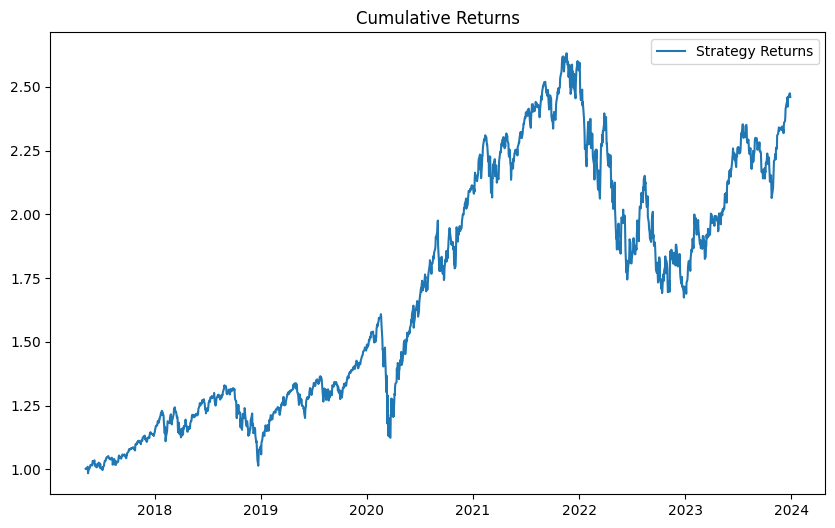

In [39]:
# Plot cumulative returns
cumulative_returns = ep.cum_returns(returns, starting_value=1.00)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Strategy Returns')
plt.title('Cumulative Returns')
plt.legend()
plt.show()

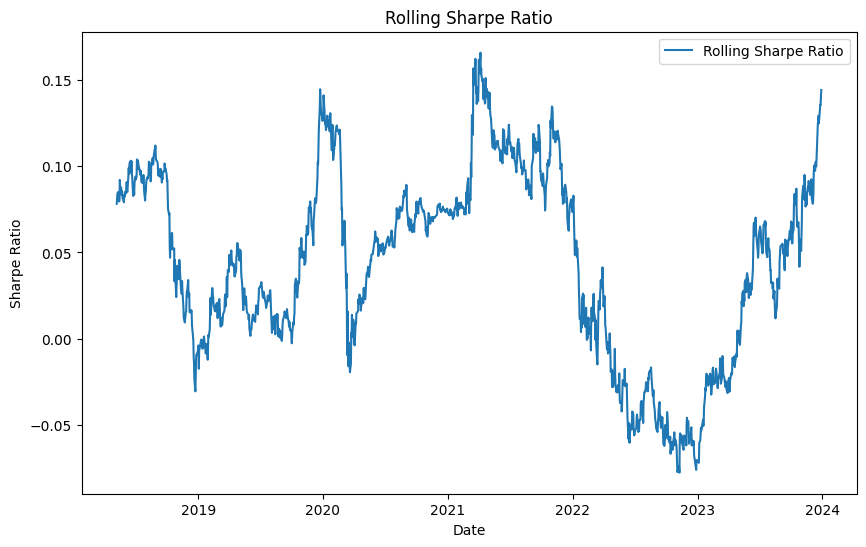

Mean of Rolling Sharpe Ratio: 0.04377092063242142


In [40]:
# Calculate rolling Sharpe ratio
def rolling_sharpe_ratio(returns, window=252):
    return returns.rolling(window=window).mean() / returns.rolling(window=window).std()

# Calculate the rolling Sharpe ratio
rolling_sharpe = rolling_sharpe_ratio(returns)

# Plot the rolling Sharpe ratio
plt.figure(figsize=(10, 6))
plt.plot(rolling_sharpe, label='Rolling Sharpe Ratio')
plt.title('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()

# Print the mean of the rolling Sharpe ratio
print('Mean of Rolling Sharpe Ratio:', rolling_sharpe.mean())

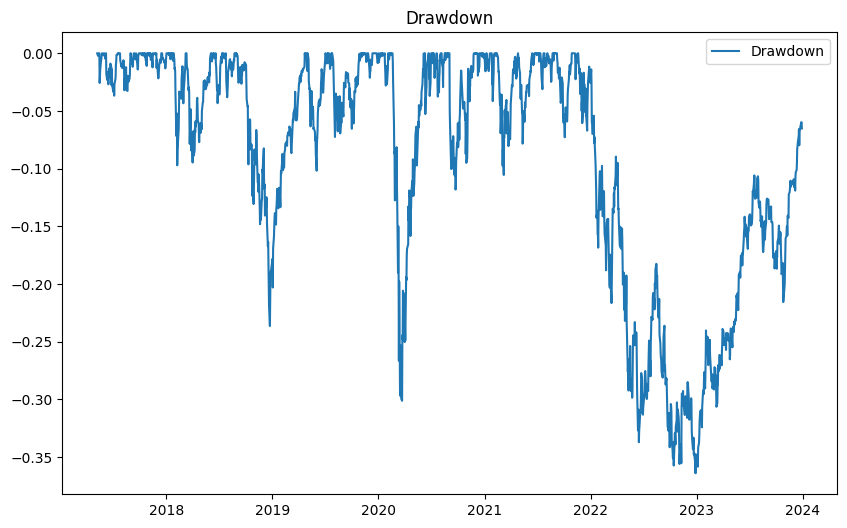

-0.09038701798593941



In [41]:
# Calculate drawdown
def calculate_drawdown(returns):
    cum_returns = (1 + returns).cumprod()
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    return drawdown

drawdown = calculate_drawdown(returns)
plt.figure(figsize=(10, 6))
plt.plot(drawdown, label='Drawdown')
plt.title('Drawdown')
plt.legend()
plt.show()

print(drawdown.mean())

print()

In [42]:
print("Maximum drawdown : ", drawdown.min())

Maximum drawdown :  -0.36395279909120154


In [43]:
print(df.loc[df.index[0]])

Open          3.295000e+02
High          3.301000e+02
Low           3.259000e+02
Close         3.295000e+02
Volume        1.042200e+08
MACD         -1.300320e+01
Pct_Change    5.799737e-01
RSI           3.050847e+01
RSI_EMA       2.635767e+01
RSI_ta        2.721854e+01
MA10          3.408400e+02
MA50          3.719820e+02
MA200         4.240266e+02
MA20          3.488200e+02
std_dev       1.341808e+01
Upper_BB      3.756562e+02
Lower_BB      3.219838e+02
Target        0.000000e+00
VIX           3.194000e+01
Signal        0.000000e+00
Position      0.000000e+00
Name: 1990-10-15 00:00:00-04:00, dtype: float64


In [44]:
# df.to_csv("df.csv")
# returns.to_csv("returns.csv")